In [5]:
import pandas
import pandas as pd
from datetime import datetime
# read in CSV
RAW_DF = pd.read_csv('surveyresponses2021.csv') # this year's responses (2021 data)
OLD_DF = pd.read_csv('2020-wics-advocacy-survey-responses.csv') # last year's responses

In [6]:
# DATA CLEANING

# drop metadata columns
CLEAN_DF = RAW_DF.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage'])
OLD_DF = OLD_DF.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage'])
# create question key
QUESTION_KEY = CLEAN_DF.drop(range(1, CLEAN_DF.shape[0])).to_dict()
# drop metadata rows
CLEAN_DF = CLEAN_DF.drop([0, 1])

# standardize expected graduation date with datetime
DATETIME_COL = pd.to_datetime(CLEAN_DF['Q2'], errors='coerce')
DATETIME_COL[DATETIME_COL.isna()] = pd.to_datetime(CLEAN_DF['Q2'][DATETIME_COL.isna()], format='%M/%y')
# add column with expected graduation date as datetime
CLEAN_DF['Q2_DT'] = DATETIME_COL
# drop responses for respondents outside of graduation date range
CLEAN_DF = CLEAN_DF[(datetime(2021, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2026, 8, 31))]

In [7]:
# CONSTANTS

# schools
ARTS_HUMANITIES = ['Art, Film, and Visual Studies', 'Classics', 'Comparative Literature', 'East Asian Studies', 'English', 'Folklore and Mythology', 'Germanic Languages and Literatures', 'History and Literature', 'History of Art and Architecture', 'Linguistics', 'Music', 'Near Eastern Languages and Civilizations', 'Philosophy', 'Religion, Comparative Study of', 'Romance Languages and Literatures', 'Slavic Languages and Literatures', 'South Asian Studies', 'Theater, Dance, & Media']
SOCIAL_SCIENCES = ['African and African American Studies', 'Anthropology', 'Economics', 'Environmental Science and Public Policy', 'Government', 'History', 'History and Science', 'Psychology', 'Social Studies', 'Sociology', 'Women, Gender, and Sexuality, Study of']
PURE_SCIENCES = ['Astrophysics', 'Chemical and Physical Biology', 'Chemistry', 'Chemistry and Physics', 'Earth and Planetary Sciences', 'Human Developmental and Regenerative Biology', 'Human Evolutionary Biology', 'Integrative Biology', 'Mathematics', 'Molecular and Cellular Biology', 'Neuroscience', 'Physics', 'Statistics']
SEAS = ['Applied Mathematics', 'Biomedical Engineering', 'Computer Science', 'Electrical Engineering', 'Engineering Sciences', 'Environmental Science and Engineering', 'Mechanical Engineering']
UNDECIDED = ['Undecided']
NONE = ['None']

# class year
FIRSTYEAR = (datetime(2024, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2025, 8, 31))
SOPHOMORE = (datetime(2023, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2024, 8, 31))
JUNIOR = (datetime(2022, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2023, 8, 31))
SENIOR = (datetime(2021, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2022, 8, 31))

# gender identity
MALE = ['Man']
NONMALE = ['Woman', 'Non-binary']

# sexual orientation
STRAIGHT = ['Straight/Heterosexual']
NONSTRAIGHT = ['Queer', 'Questioning or unsure']

# diagnosed with disability/impairment
DIAGNOSED = ['Yes, I have been diagnosed with a disability or impairment']
NONDIAGNOSED = ['No, I have not been diagnosed with a disability or impairment']


In [8]:
# LIKERT SCALES

LIKERT_KNOWLEDGE_KEY = {
    'Significantly less knowledgeable' : 1,
    'Less knowledgeable' : 2,
    'Slightly less knowledgeable' : 3,
    'Similarly knowledgeable' : 4,
    'Slightly more knowledgeable' : 5,
    'More knowledgeable' : 6,
    'Significantly more knowledgeable' : 7
}

LIKERT_AGREEMENT_KEY = {
    'Strongly disagree' : 1,
    'Disagree' : 2,
    'Somewhat disagree' : 3,
    'Neither agree nor disagree' : 4,
    'Somewhat agree' : 5,
    'Agree' : 6,
    'Strongly agree' : 7
}

### Section 6 (Q26, Q27, Q28, Q29) - Alyssa

In [31]:
MALE_DF = CLEAN_DF[CLEAN_DF['Q30'].isin(MALE)]
NONMALE_DF = CLEAN_DF[CLEAN_DF['Q30'].isin(NONMALE)]
NONSTRAIGHT_DF = CLEAN_DF[CLEAN_DF['Q32'].isin(NONSTRAIGHT)]
STRAIGHT_DF = CLEAN_DF[CLEAN_DF['Q32'].isin(STRAIGHT)]
WHITE_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('White', na=False)]
ASIAN_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Asian', na=False)]
BLACK_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Black or African American', na=False)]
HISPANIC_DF = CLEAN_DF[CLEAN_DF['Q34'] == 'Yes, of Hispanic or Latinx origin']
FGLI_DF = CLEAN_DF[(CLEAN_DF['Q35'] == 'Yes') | (CLEAN_DF['Q36'] == 'Yes')]
NONFGLI_DF = CLEAN_DF[(CLEAN_DF['Q35'] == 'No') & (CLEAN_DF['Q36'] == 'No')]
DIS_DF = CLEAN_DF[CLEAN_DF['Q37'].isin(DIAGNOSED)]
NONDIS_DF = CLEAN_DF[CLEAN_DF['Q37'].isin(NONDIAGNOSED)]

df_lst = {'Male': MALE_DF, 'Nonmale': NONMALE_DF, 'Nonstraight': NONSTRAIGHT_DF, 'Straight': STRAIGHT_DF,
          'White': WHITE_DF, 'Asian': ASIAN_DF, 'Black': BLACK_DF, 'Hispanic': HISPANIC_DF,
          'FGLI': FGLI_DF, 'NONFGLI_DF': NONFGLI_DF, 'DIS_DF': DIS_DF, 'NONDIS_DF': NONDIS_DF}

In [46]:
# Q26 - Have you ever been involved in a student organization at Harvard relating to computer science, engineering, or technology?
for df in df_lst:
    counts = df_lst[df]['Q26'].value_counts()
    percent = int(100* counts[0]/(counts[0] + counts[1]))
    print(df + "'s percent yes: " + str(percent) + '%')


Male's percent yes: 88%
Nonmale's percent yes: 78%
Nonstraight's percent yes: 61%
Straight's percent yes: 88%
White's percent yes: 73%
Asian's percent yes: 83%
Black's percent yes: 50%
Hispanic's percent yes: 66%
FGLI's percent yes: 56%
NONFGLI_DF's percent yes: 85%
DIS_DF's percent yes: 75%
NONDIS_DF's percent yes: 80%


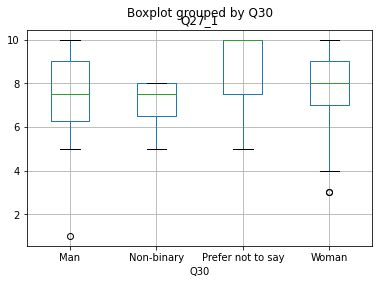

In [78]:
# Q27 - On a scale of 1 - 10, how stressful is the process of finding an internship or job? ( 1 being the least stressful, and 10 being the most)
CLEAN_DF['Q27_1'] = CLEAN_DF['Q27_1'].astype('float')
gender_column = 'Q30'
boxplot = CLEAN_DF.boxplot(column=['Q27_1'], by=gender_column)

# sexuality_column = 'Q32'
# boxplot = CLEAN_DF.boxplot(column=['Q27_1'], by=sexuality_column)

# race_column = 'Q33'
# boxplot = CLEAN_DF.boxplot(column=['Q27_1'], by=race_column)

# fgli_column = 'Q35'
# boxplot = CLEAN_DF.boxplot(column=['Q27_1'], by=fgli_column)

# low_income_column = 'Q36'
# boxplot = CLEAN_DF.boxplot(column=['Q27_1'], by=low_income_column)

# dis_column = 'Q37'
# boxplot = CLEAN_DF.boxplot(column=['Q27_1'], by=dis_column)


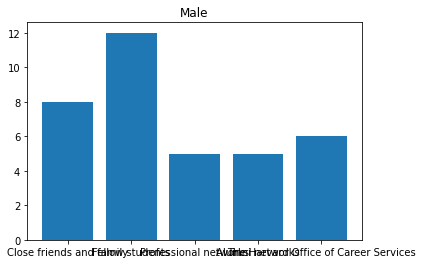

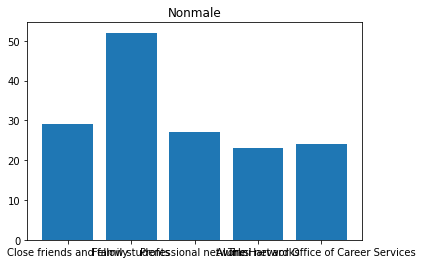

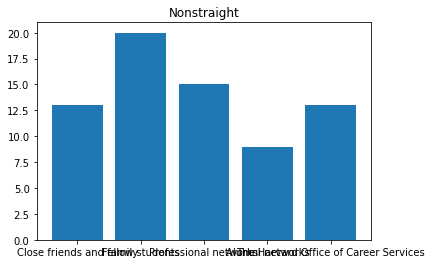

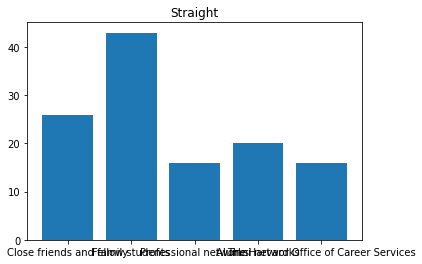

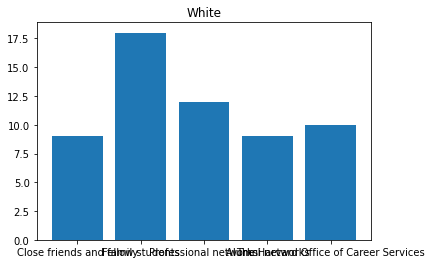

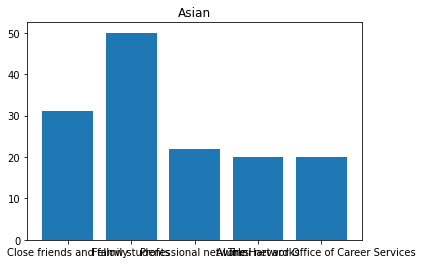

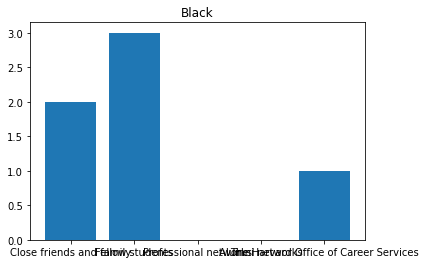

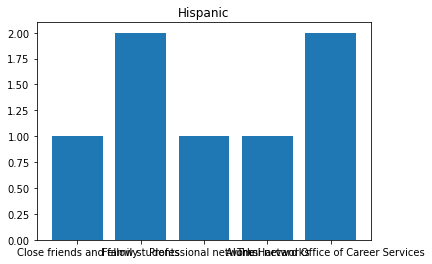

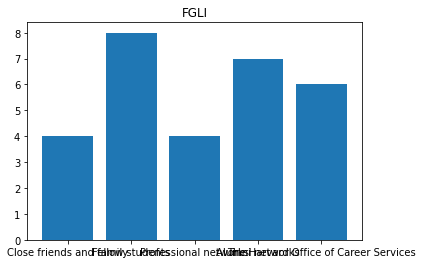

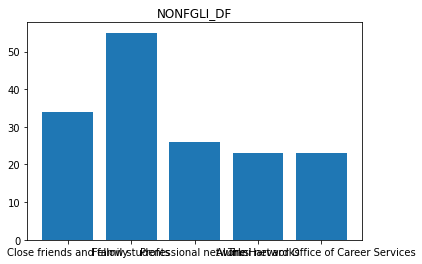

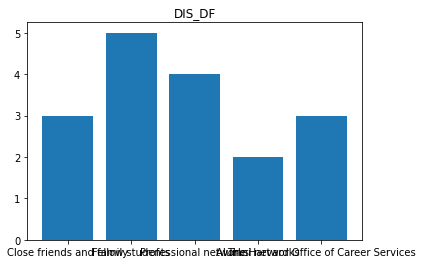

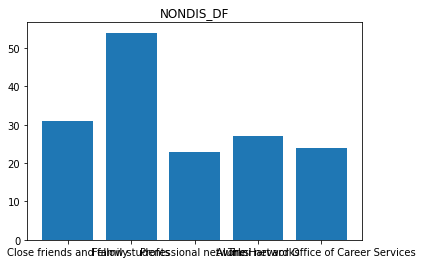

In [90]:
# Q28 - Please indicate which of the following statements you agree with: When looking for internships and job opportunities, direct connections or referrals are accessible to me through…

from matplotlib import pyplot as plt

def get_counts(df, question):
    res = {'Close friends and family': 0, 'Fellow students': 0, 'Professional networks': 0, 'Alumni networks': 0, 'The Harvard Office of Career Services': 0}
    for row in df[question].dropna():
        for key in res:
            if key in row:
                res[key] += 1
                
    return res
        
for df in df_lst:
    dct = get_counts(df_lst[df], 'Q28')
    plt.bar(list(dct.keys()), dct.values())
    plt.title(df)
    plt.show()

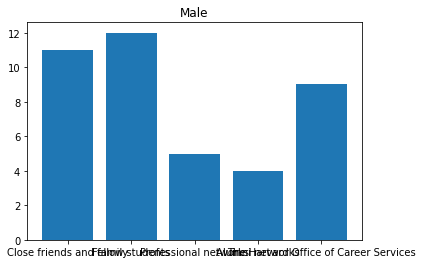

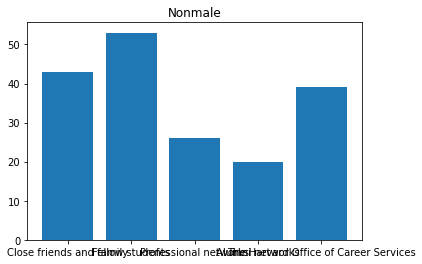

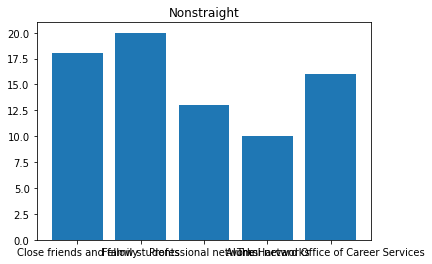

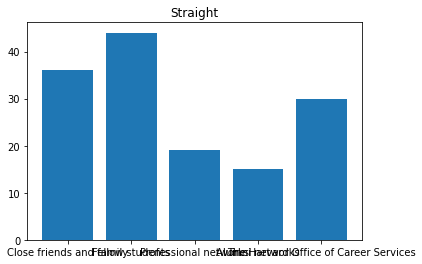

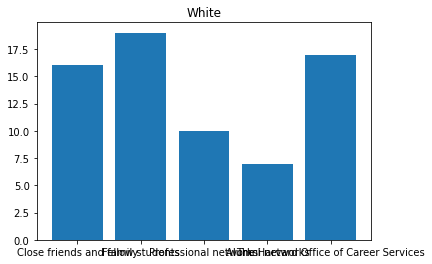

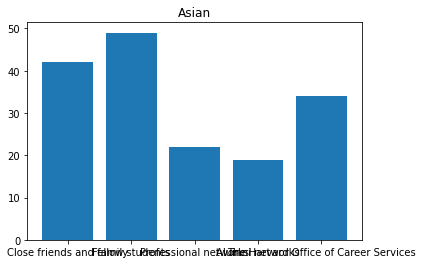

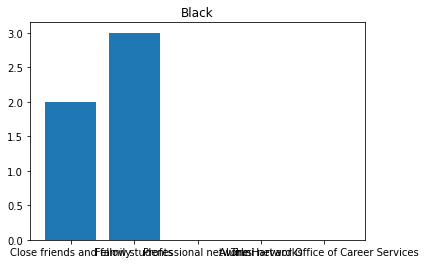

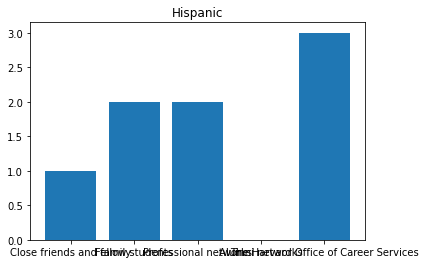

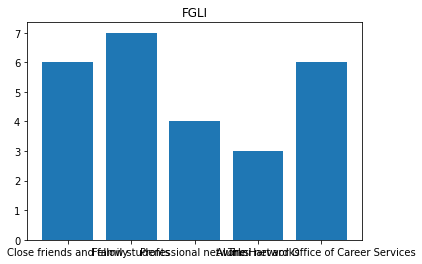

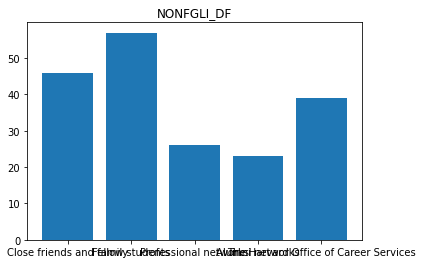

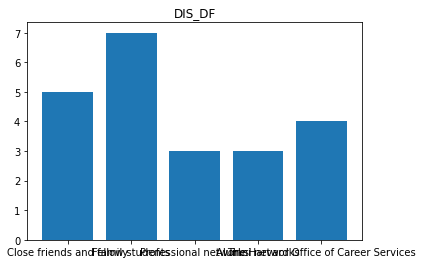

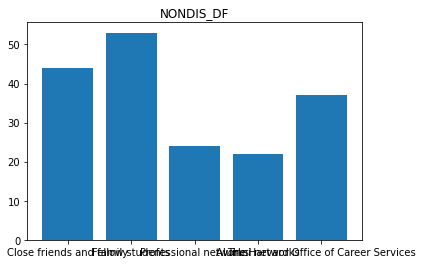

In [91]:
# Q29 - Please indicate which of the following statements you agree with: When looking for internships and job opportunities, guidance and mentorship are accessible to me through…

for df in df_lst:
    dct = get_counts(df_lst[df], 'Q29')
    plt.bar(list(dct.keys()), dct.values())
    plt.title(df)
    plt.show()


In [ ]:
# TODO: Write up and Compare with 2020 data